# MNIST in TF2
---

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
#all the examples in TF2 need preprocessing, they are not included 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 1. Import Data Set

In [3]:
# TF now only has the tools to create architectures
# Keras has all the datasets & API
mnist = tf.keras.datasets.mnist  
(x_train,y_train), (x_test,y_test) = mnist.load_data()

## Checking the Data Set

(60000,)
(60000, 28, 28)


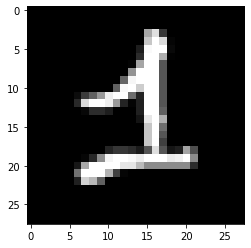

In [4]:
print(y_train.shape)
print(x_train.shape)
imagedemo = x_train[24]
plt.imshow(imagedemo,cmap = 'gray')

In [5]:
def print_image(img):
  s = '\n'.join([''.join(['{:4}'.format(int(round(item * 255))) for item in row]) for row in img])
  print(s)

print_image(imagedemo)

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0423305661014025   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   05023564770555901275   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   073956349564770647702295   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   011475647706477044370 510   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0102041820647706477021675   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   03723064770647706477021675  

## Preprocessing the Data Set

In [6]:
''' Reshape the input for the DNN '''
# Only TF1 had tools for preprocessing, now all is with numpy and sklearn
x_train = x_train.reshape(-1,28*28).astype('float32')  # in TF2 is important the data type for TF2 
x_test = x_test.reshape(-1,28*28).astype('float32')
print(x_train.shape)
x_train 

(60000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
''' Codify the outputs from CATEGORICAL to ONE HOT '''
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train),1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test),1)
y_test_one_hot = onehot_encoder.fit_transform(y_test)
y_train_onehot.shape

(60000, 10)

# 2. Set up the architecture

In [8]:
class DNN_Model(object):
  def __init__(self,
              n_nodes_input = 784,
              n_nodes_hl1 = 500,
              n_nodes_hl2 = 500,
              n_nodes_hl3 = 500,
              n_classes = 10):
    # Declare DNN Variables with numpy
    self.hl1W = tf.Variable(np.random.rand(n_nodes_input,n_nodes_hl1),name = "hl1weights",dtype = "float32")
    self.hl1B = tf.Variable(np.random.rand(n_nodes_hl1),name = "hl1bias",dtype = "float32")
    self.hl2W = tf.Variable(np.random.rand(n_nodes_hl1,n_nodes_hl2),name = "hl2weights",dtype = "float32")
    self.hl2B = tf.Variable(np.random.rand(n_nodes_hl2),name = "hl2bias",dtype = "float32")
    self.hl3W = tf.Variable(np.random.rand(n_nodes_hl2,n_nodes_hl3),name = "hl3weights",dtype = "float32")
    self.hl3B = tf.Variable(np.random.rand(n_nodes_hl3),name = "hl3bias",dtype = "float32")
    self.outW = tf.Variable(np.random.rand(n_nodes_hl3,n_classes),name = "outweights",dtype = "float32")
    self.outB = tf.Variable(np.random.rand(n_classes),name = "outbias",dtype = "float32")
    # Auxiliar List
    self.trainable_variables = [self.hl1W,self.hl1B,self.hl2W,self.hl2B,self.hl3W,self.hl3B,self.outW,self.outB]

  def __call__(self,x):
    # Declare architecture
    l1 = tf.add(tf.matmul(x,self.hl1W),self.hl1B)
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,self.hl2W),self.hl2B)
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,self.hl3W),self.hl3B)
    l3 = tf.nn.relu(l3)

    output = tf.add(tf.matmul(l3,self.outW),self.outB)

    return output


DNN = DNN_Model()   # model declaration
DNN(x_train[24:30]) # forward propagation

<tf.Tensor: shape=(6, 10), dtype=float32, numpy=
array([[1.71623678e+11, 1.70397237e+11, 1.74620508e+11, 1.73351322e+11,
        1.72562088e+11, 1.68280031e+11, 1.68686830e+11, 1.74971503e+11,
        1.69804087e+11, 1.67246299e+11],
       [3.19618154e+11, 3.17333275e+11, 3.25199004e+11, 3.22835743e+11,
        3.21365770e+11, 3.13391120e+11, 3.14148585e+11, 3.25853381e+11,
        3.16229157e+11, 3.11465705e+11],
       [1.06098754e+11, 1.05340387e+11, 1.07951243e+11, 1.07166999e+11,
        1.06678927e+11, 1.04031650e+11, 1.04283038e+11, 1.08168528e+11,
        1.04973779e+11, 1.03392633e+11],
       [3.61657860e+11, 3.59072629e+11, 3.67972385e+11, 3.65298516e+11,
        3.63635540e+11, 3.54612085e+11, 3.55468771e+11, 3.68713138e+11,
        3.57823021e+11, 3.52433275e+11],
       [3.26261473e+11, 3.23929309e+11, 3.31958223e+11, 3.29546138e+11,
        3.28045593e+11, 3.19905137e+11, 3.20678396e+11, 3.32626330e+11,
        3.22801959e+11, 3.17939909e+11],
       [1.23629273e+11, 1.

# 3. Choose optimizer & Metrics

In [9]:
'''Optmizer'''
#optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

'''Metrics'''
# Declare which one is going to be our cost function 
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

# 4. Training & Testing



In [10]:
@tf.function #NOT EAGER EXECUTION
def train_step(model,data,labels):
  with tf.GradientTape() as tape: # in tape the gradients are going to be saved
    predictions = model(data) # forward propagation
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels,predictions)) # compute cost function

  #optimize
  gradients = tape.gradient(loss,model.trainable_variables)
  capped_grads_and_vars = [(grad,model.trainable_variables[index]) for index,grad in enumerate(gradients)]
  #adjust variables
  optimizer.apply_gradients(capped_grads_and_vars)
  train_loss(loss)
  train_accuracy(labels,predictions)



In [11]:
@tf.function
def test_step(model,data,labels):
  predictions = model(data)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels,predictions))
  test_loss(loss)
  test_accuracy(labels,predictions)

In [12]:
def fitting(model,train_x,train_y,test_x,test_y,epochs,n_batch,batch_size):
  for epoch in range(epochs):
    i = 0
    while i + batch_size < len(train_x) or i + batch_size < batch_size * n_batch:
      start = i
      end = start + batch_size
      batch_x = train_x[start:end]
      batch_y = train_y[start:end]
      train_step(model,batch_x,batch_y)
      i += batch_size
    test_step(model,test_x,test_y)
    template = 'Epoch {},Loss:{},Accuracy:{},Test Loss:{}, Test Accuracy:{}'
    print(template.format(epoch+1,
                          train_loss.result(),
                          train_accuracy.result()*100,
                          test_loss.result(),
                          test_accuracy.result() * 100))
    train_loss.reset_states() 
    train_accuracy.reset_states()
    
    test_loss.reset_states()
    test_accuracy.reset_states() 



In [13]:
fitting(DNN,x_train,y_train_onehot,x_test,y_test_one_hot,10,600,100)

Epoch 1,Loss:240179456.0,Accuracy:9.94991683959961,Test Loss:143054624.0, Test Accuracy:8.920000076293945
Epoch 2,Loss:34730192.0,Accuracy:13.055091857910156,Test Loss:4398840.0, Test Accuracy:30.970001220703125
Epoch 3,Loss:915240.25,Accuracy:54.684471130371094,Test Loss:834618.3125, Test Accuracy:57.290000915527344
Epoch 4,Loss:262659.4375,Accuracy:69.72454071044922,Test Loss:173236.53125, Test Accuracy:74.87999725341797
Epoch 5,Loss:190536.609375,Accuracy:74.74457550048828,Test Loss:100237.109375, Test Accuracy:82.16999816894531
Epoch 6,Loss:123406.171875,Accuracy:79.93321990966797,Test Loss:201471.390625, Test Accuracy:71.5
Epoch 7,Loss:81124.0234375,Accuracy:83.39733123779297,Test Loss:77863.5234375, Test Accuracy:82.6300048828125
Epoch 8,Loss:46949.875,Accuracy:86.92654418945312,Test Loss:31633.5234375, Test Accuracy:89.42000579833984
Epoch 9,Loss:27093.49609375,Accuracy:88.97663116455078,Test Loss:17833.66796875, Test Accuracy:91.00999450683594
Epoch 10,Loss:15386.69140625,Accur